In [1]:
import pandas as pd
import numpy as np

In [2]:
coll_pd=pd.read_csv("https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")
coll_pd.shape

(221738, 40)

In [3]:
coll_pd.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [52]:
coll_human_pd = coll_pd[['SEVERITYCODE','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING']]
coll_human_pd['SEVERITYCODE'].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [53]:
#Data Preparation
# 1. SEVERITYCODE, drop 'nan', nan
coll_human_pd.dropna(subset=['SEVERITYCODE'], how='all', inplace=True)
coll_human_pd = coll_human_pd[coll_human_pd['SEVERITYCODE']!='nan']
coll_human_pd['SEVERITYCODE'] = coll_human_pd['SEVERITYCODE'].astype('str')
coll_human_pd['SEVERITYCODE'].value_counts()

C:\java\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [54]:
#Data Preparation
# 2. drop nan records when all human factors are nan
print("shape before: ",coll_human_pd.shape)
coll_human_pd.dropna(subset=['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING'], how='all', inplace=True)
print("shape after: ",coll_human_pd.shape)

shape before:  (221737, 8)
shape after:  (195307, 8)


In [55]:
#Data Preparation
# 3. Standardize INATTENTIONIND: NaN to 0, N to 0, Y to 1

coll_human_pd['INATTENTIONIND'] = coll_human_pd['INATTENTIONIND'].replace(np.nan, '0')
coll_human_pd['INATTENTIONIND'] = coll_human_pd['INATTENTIONIND'].replace('N', '0')
coll_human_pd['INATTENTIONIND'] = coll_human_pd['INATTENTIONIND'].replace('Y','1')
coll_human_pd['INATTENTIONIND'] = coll_human_pd['INATTENTIONIND'].astype('int')
coll_human_pd['INATTENTIONIND'].value_counts()

0    165119
1     30188
Name: INATTENTIONIND, dtype: int64

In [56]:
# 4. Standardize UNDERINFL: NaN to 0, N to 0, Y to 1

coll_human_pd['UNDERINFL'] = coll_human_pd['UNDERINFL'].replace(np.nan, '0')
coll_human_pd['UNDERINFL'] = coll_human_pd['UNDERINFL'].replace('N', '0')
coll_human_pd['UNDERINFL'] = coll_human_pd['UNDERINFL'].replace('Y','1')
coll_human_pd['UNDERINFL'] = coll_human_pd['UNDERINFL'].astype('int')
coll_human_pd['UNDERINFL'].value_counts()

0    185678
1      9629
Name: UNDERINFL, dtype: int64

In [57]:
# 5. Standardize SPEEDING: nan to 0, N to 0, Y to 1

coll_human_pd['SPEEDING'] = coll_human_pd['SPEEDING'].replace(np.nan, '0')
coll_human_pd['SPEEDING'] = coll_human_pd['SPEEDING'].replace('N', '0')
coll_human_pd['SPEEDING'] = coll_human_pd['SPEEDING'].replace('Y','1')
coll_human_pd['SPEEDING'] = coll_human_pd['SPEEDING'].astype('int')
coll_human_pd['SPEEDING'].value_counts()

0    185371
1      9936
Name: SPEEDING, dtype: int64

In [58]:
# 4. Standardize PEDROWNOTGRNT: Nan to 0, N to 0, Y to 1
coll_human_pd['PEDROWNOTGRNT'] = coll_human_pd['PEDROWNOTGRNT'].replace(np.nan, '0')
coll_human_pd['PEDROWNOTGRNT'] = coll_human_pd['PEDROWNOTGRNT'].replace('N', '0')
coll_human_pd['PEDROWNOTGRNT'] = coll_human_pd['PEDROWNOTGRNT'].replace('Y','1')
coll_human_pd['PEDROWNOTGRNT'] = coll_human_pd['PEDROWNOTGRNT'].astype('int')
coll_human_pd['PEDROWNOTGRNT'].value_counts()

0    190112
1      5195
Name: PEDROWNOTGRNT, dtype: int64

In [59]:
# Logistic Regression on Human factors

X = np.asarray(coll_human_pd[['INATTENTIONIND', 'SPEEDING', 'UNDERINFL', 'PEDROWNOTGRNT']])
y = np.asarray(coll_human_pd['SEVERITYCODE'])

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)
print(LR.coef_, LR.intercept_)

Train set: (156245, 4) (156245,)
Test set: (39062, 4) (39062,)


In [60]:
# Defining plot_confusion_matrix function

import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
print(np.unique(y_test))
print(np.unique(yhat))
print(np.unique(yhat))
print("Before: ",np.size(y_test), np.size(yhat))

from sklearn.metrics import jaccard_similarity_score
print ('jaccard_similarity_score:', jaccard_similarity_score(y_test, yhat))

#from sklearn.metrics import log_loss
#print ('log_loss: ', log_loss(y_test, yhat_prob))

print (classification_report(y_test, yhat))

['1' '2' '2b' '3']
['1' '2']
['1' '2']
Before:  39062 39062


C:\java\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


jaccard_similarity_score: 0.7092826788182889


C:\java\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.71      1.00      0.83     26947
           2       0.83      0.07      0.14     11445
          2b       0.00      0.00      0.00       618
           3       0.00      0.00      0.00        52

    accuracy                           0.71     39062
   macro avg       0.38      0.27      0.24     39062
weighted avg       0.73      0.71      0.61     39062



Confusion matrix, without normalization
[[    0     0     0     0     0]
 [    0 26857    90     0     0]
 [    0 10596   849     0     0]
 [    0   538    80     0     0]
 [    0    43     9     0     0]]


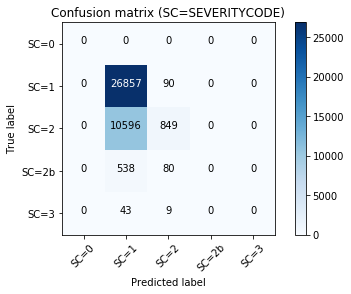

In [62]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,'2b',3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SC=0','SC=1','SC=2','SC=2b','SC=3'],normalize= False,  title='Confusion matrix (SC=SEVERITYCODE)')

In [91]:
coll_nature_pd = coll_pd[['SEVERITYCODE','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]

In [92]:
#Data Preparation
# 1. SEVERITYCODE, drop 'nan', nan
coll_nature_pd.dropna(subset=['SEVERITYCODE'], how='all', inplace=True)
coll_nature_pd = coll_nature_pd[coll_nature_pd['SEVERITYCODE']!='nan']
coll_nature_pd['SEVERITYCODE'] = coll_nature_pd['SEVERITYCODE'].astype('str')
coll_nature_pd['SEVERITYCODE'].value_counts()

C:\java\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [93]:
#Data Preparation
# 2. drop nan records when all natural factors are nan
print("shape before: ",coll_nature_pd.shape)
coll_nature_pd.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], how='all', inplace=True)
columns = ['WEATHER','ROADCOND','LIGHTCOND']
#coll_nature_pd['SEVERITYCODE'] = coll_nature_pd[columns].ne('Unknown').all(axis=1)
print("shape after: ",coll_nature_pd.shape)

shape before:  (221737, 7)
shape after:  (195243, 7)


In [94]:
#Data Preparation
# 3. Standardize WEATHER: NaN to Unknown

coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].replace(np.nan, 'Unknown')
coll_nature_pd['WEATHER'].value_counts()

Clear                       114807
Raining                      34038
Overcast                     28555
Unknown                      15278
Snowing                        919
Other                          860
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [95]:
#Data Preparation
# 4. Standardize ROADCOND: NaN to Unknown

coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].replace(np.nan, 'Unknown')
coll_nature_pd['ROADCOND'].value_counts()

Dry               128660
Wet                48736
Unknown            15205
Ice                 1232
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [96]:
#Data Preparation
# 5. Standardize LIGHTCOND: NaN to Unknown

coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].replace(np.nan, 'Unknown')
coll_nature_pd['LIGHTCOND'].value_counts()

Daylight                    119554
Dark - Street Lights On      50139
Unknown                      13769
Dusk                          6085
Dawn                          2609
Dark - No Street Lights       1580
Dark - Street Lights Off      1239
Other                          244
Dark - Unknown Lighting         24
Name: LIGHTCOND, dtype: int64

In [83]:
#Data Preparation
# 6. drop records when all natural factors are 'Unknown'
print("shape before: ",coll_nature_pd.shape)
columns = ['WEATHER','ROADCOND','LIGHTCOND']
#coll_nature_pd['SEVERITYCODE'] = coll_nature_pd[columns].ne('Unknown').all(axis=1)
print("shape after: ",coll_nature_pd.shape)

shape before:  (195243, 7)
shape after:  (195243, 7)


In [97]:
coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].astype('category')
coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].astype('category')
coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].astype('category')
cat_columns = coll_nature_pd.select_dtypes(['category']).columns
coll_nature_pd[cat_columns] = coll_nature_pd[cat_columns].apply(lambda x: x.cat.codes)


In [98]:
# Logistic Regression on Human factors

X = np.asarray(coll_nature_pd[['WEATHER','ROADCOND','LIGHTCOND']])
y = np.asarray(coll_nature_pd['SEVERITYCODE'])

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)
print(LR.coef_, LR.intercept_)

Train set: (156194, 3) (156194,)
Test set: (39049, 3) (39049,)


In [100]:
print(np.unique(y_test))
print(np.unique(yhat))
print(np.unique(yhat))
print("Before: ",np.size(y_test), np.size(yhat))

from sklearn.metrics import jaccard_similarity_score
print ('jaccard_similarity_score:', jaccard_similarity_score(y_test, yhat))

#from sklearn.metrics import log_loss
#print ('log_loss: ', log_loss(y_test, yhat_prob))

print (classification_report(y_test, yhat))

['1' '2' '2b' '3']
['1' '2']
['1' '2']
Before:  39049 39049
jaccard_similarity_score: 0.6875720248918026


C:\java\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\java\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.69      1.00      0.81     26848
           2       1.00      0.00      0.00     11526
          2b       0.00      0.00      0.00       602
           3       0.00      0.00      0.00        73

    accuracy                           0.69     39049
   macro avg       0.42      0.25      0.20     39049
weighted avg       0.77      0.69      0.56     39049



Confusion matrix, without normalization
[[    0     0     0     0     0]
 [    0 26848     0     0     0]
 [    0 11525     1     0     0]
 [    0   602     0     0     0]
 [    0    73     0     0     0]]


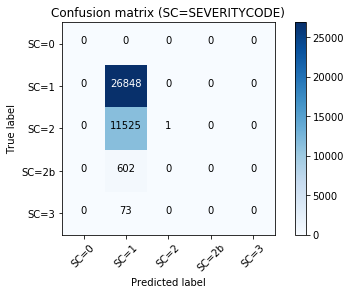

In [101]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,'2b',3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SC=0','SC=1','SC=2','SC=2b','SC=3'],normalize= False,  title='Confusion matrix (SC=SEVERITYCODE)')

# Natural factors approach 2

In [147]:
coll_nature_pd = coll_pd[['SEVERITYCODE','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]

In [148]:
#Data Preparation
# 1. SEVERITYCODE, drop 'nan', nan
coll_nature_pd.dropna(subset=['SEVERITYCODE'], how='all', inplace=True)
coll_nature_pd = coll_nature_pd[coll_nature_pd['SEVERITYCODE']!='nan']
coll_nature_pd['SEVERITYCODE'] = coll_nature_pd['SEVERITYCODE'].astype('str')
coll_nature_pd['SEVERITYCODE'].value_counts()

C:\java\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [149]:
#Data Preparation
# 2. drop nan records when all natural factors are nan
print("shape before: ",coll_nature_pd.shape)
coll_nature_pd.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], how='all', inplace=True)
columns = ['WEATHER','ROADCOND','LIGHTCOND']
#coll_nature_pd['SEVERITYCODE'] = coll_nature_pd[columns].ne('Unknown').all(axis=1)
print("shape after: ",coll_nature_pd.shape)

shape before:  (221737, 7)
shape after:  (195243, 7)


In [151]:
#Data Preparation
# 3. Standardize WEATHER: NaN to Unknown, Dry as 0, others as 1

coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].replace(np.nan, 'Unknown')
unique_values = coll_nature_pd.WEATHER.unique().tolist()
unique_values.remove('Clear')
coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].replace(unique_values, 1)
coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].replace('Clear', 0)
coll_nature_pd['WEATHER'].value_counts()

0    114807
1     80436
Name: WEATHER, dtype: int64

In [152]:
#Data Preparation
# 4. Standardize ROADCOND: NaN to Unknown, Dry as 0, others as 1

coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].replace(np.nan, 'Unknown')
unique_values = coll_nature_pd.ROADCOND.unique().tolist()
unique_values.remove('Dry')
coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].replace(unique_values, 1)
coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].replace('Dry', 0)
coll_nature_pd['ROADCOND'].value_counts()

0    128660
1     66583
Name: ROADCOND, dtype: int64

In [153]:
#Data Preparation
# 5. Standardize LIGHTCOND: NaN to Unknown, Daylight as 0, others as 1

coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].replace(np.nan, 'Unknown')
unique_values = coll_nature_pd.LIGHTCOND.unique().tolist()
unique_values.remove('Daylight')
coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].replace(unique_values, 1)
coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].replace('Daylight', 0)
coll_nature_pd['LIGHTCOND'].value_counts()

0    119554
1     75689
Name: LIGHTCOND, dtype: int64

In [154]:
# Logistic Regression on Human factors

X = np.asarray(coll_nature_pd[['WEATHER','ROADCOND','LIGHTCOND']])
y = np.asarray(coll_nature_pd['SEVERITYCODE'])

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)
print(LR.coef_, LR.intercept_)

Train set: (156194, 3) (156194,)
Test set: (39049, 3) (39049,)


In [156]:
print(np.unique(y_test))
print(np.unique(yhat))
print("Before: ",np.size(y_test), np.size(yhat))

from sklearn.metrics import jaccard_similarity_score
print ('jaccard_similarity_score:', jaccard_similarity_score(y_test, yhat))

#from sklearn.metrics import log_loss
#print ('log_loss: ', log_loss(y_test, yhat_prob))

print (classification_report(y_test, yhat))

['1' '2' '2b' '3']
['1']
Before:  39049 39049
jaccard_similarity_score: 0.6875464160413839


C:\java\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\java\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.69      1.00      0.81     26848
           2       0.00      0.00      0.00     11526
          2b       0.00      0.00      0.00       602
           3       0.00      0.00      0.00        73

    accuracy                           0.69     39049
   macro avg       0.17      0.25      0.20     39049
weighted avg       0.47      0.69      0.56     39049



Confusion matrix, without normalization
[[    0     0     0     0     0]
 [    0 26848     0     0     0]
 [    0 11526     0     0     0]
 [    0   602     0     0     0]
 [    0    73     0     0     0]]


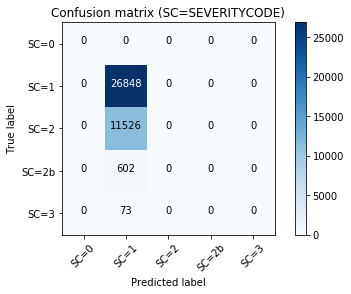

In [157]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,'2b',3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SC=0','SC=1','SC=2','SC=2b','SC=3'],normalize= False,  title='Confusion matrix (SC=SEVERITYCODE)')

## Using Decision Tree

In [160]:
coll_nature_pd = coll_pd[['SEVERITYCODE','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]

In [161]:
#Data Preparation
# 1. SEVERITYCODE, drop 'nan', nan
coll_nature_pd.dropna(subset=['SEVERITYCODE'], how='all', inplace=True)
coll_nature_pd = coll_nature_pd[coll_nature_pd['SEVERITYCODE']!='nan']
coll_nature_pd['SEVERITYCODE'] = coll_nature_pd['SEVERITYCODE'].astype('str')
coll_nature_pd['SEVERITYCODE'].value_counts()

#Data Preparation
# 2. drop nan records when all natural factors are nan
print("shape before: ",coll_nature_pd.shape)
coll_nature_pd.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], how='all', inplace=True)
print("shape after: ",coll_nature_pd.shape)

#Data Preparation
# 3. Standardize WEATHER: NaN to Unknown, Dry as 0, others as 1

coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].replace(np.nan, 'Unknown')
unique_values = coll_nature_pd.WEATHER.unique().tolist()
unique_values.remove('Clear')
coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].replace(unique_values, 1)
coll_nature_pd['WEATHER'] = coll_nature_pd['WEATHER'].replace('Clear', 0)
coll_nature_pd['WEATHER'].value_counts()

#Data Preparation
# 4. Standardize ROADCOND: NaN to Unknown, Dry as 0, others as 1

coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].replace(np.nan, 'Unknown')
unique_values = coll_nature_pd.ROADCOND.unique().tolist()
unique_values.remove('Dry')
coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].replace(unique_values, 1)
coll_nature_pd['ROADCOND'] = coll_nature_pd['ROADCOND'].replace('Dry', 0)
coll_nature_pd['ROADCOND'].value_counts()

#Data Preparation
# 5. Standardize LIGHTCOND: NaN to Unknown, Daylight as 0, others as 1

coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].replace(np.nan, 'Unknown')
unique_values = coll_nature_pd.LIGHTCOND.unique().tolist()
unique_values.remove('Daylight')
coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].replace(unique_values, 1)
coll_nature_pd['LIGHTCOND'] = coll_nature_pd['LIGHTCOND'].replace('Daylight', 0)
coll_nature_pd['LIGHTCOND'].value_counts()



C:\java\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


shape before:  (221737, 7)
shape after:  (195243, 7)


0    119554
1     75689
Name: LIGHTCOND, dtype: int64

In [162]:
X = coll_nature_pd[['WEATHER','ROADCOND','LIGHTCOND']].values
y = coll_nature_pd['SEVERITYCODE']

In [164]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(X_trainset,y_trainset)
predTree = tree.predict(X_testset)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6875464160413839


In [167]:
X = coll_human_pd[['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING']].values
y = coll_human_pd['SEVERITYCODE']

In [168]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(X_trainset,y_trainset)
predTree = tree.predict(X_testset)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7090960292875247


In [171]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=5131af462e2c8a05018507ceb12bdd60e79cc2850697ec14ddeaf59680f1cc5c
  Stored in directory: c:\users\damini karekar\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.
